In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
tf.autograph.set_verbosity(0)

In [97]:
x = np.zeros((2, 200))
x_1 = np.random.randint(120, 200, (1, 200))
x_2 = np.random.randint(10, 20, (1, 200))
y = np.zeros((1, 200))
y[(x_1+10*x_2) > 300] = 1
x[0] = x_1
x[1] = x_2

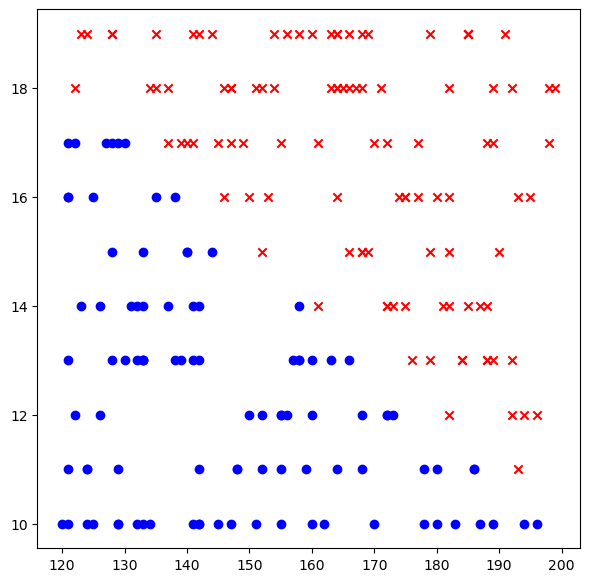

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
cross = (y >= 0.5)
dot = (y < 0.5)
cross = cross[0]
dot = dot[0]
plt.scatter(x[0][cross], x[1][cross], c='r', marker='x')
plt.scatter(x[0][dot], x[1][dot], c='b', marker='o')

In [105]:
print(f"Temperature Max, Min pre normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
Xn = norm_l(x).numpy()
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 188.00, 14.00
Duration    Max, Min pre normalization: 188.00, 13.00
Temperature Max, Min post normalization: 1.00, -1.00
Duration    Max, Min post normalization: 1.00, -1.00


Tile/copy our data to increase the training set sizze and reduce the numebr of training epochs.

In [106]:
Xt = np.tile(Xn.transpose(),(1000,1))
Yt= np.tile(y.transpose(),(1000,1))   
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


## Tensorflow Model

In [107]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [109]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [110]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.22478402  0.25386345  0.07246161]
 [-0.43940854  0.7634984   0.9970143 ]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[0.9448105]
 [0.8901614]
 [0.6535541]] 
b2(1,): [0.]


In [111]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.6931
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.6926
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.6926
Epoch 4/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.6925
Epoch 5/10
6250/6250 [==============================] - 18s 3ms/step - loss: 0.6925
Epoch 6/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.6926
Epoch 7/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.6926
Epoch 8/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.6926
Epoch 9/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.6926
Epoch 10/10
6250/6250 [==============================] - 24s 4ms/step - loss: 0.6926


In [112]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-4.7864504 -4.3902864 -4.454529 ]
 [ 4.571815   5.407666   5.5239787]] 
b1: [-5.011242  -4.644142  -4.5269933]
W2:
 [[-0.00269544]
 [-0.00263368]
 [-0.00246488]] 
b2: [0.07812048]


In [113]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])